PCA is an unsupervised statistical method.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

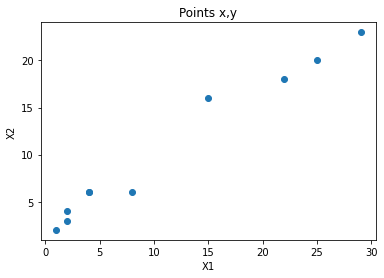

In [ ]:
X1=[2,8,1,4,22,15,25,29,4,2]
X2=[3,6,2,6,18,16,20,23,6,4]
plt.scatter(X1,X2)
plt.title("Points x,y")
plt.xlabel("X1")
plt.ylabel("X2");

In [ ]:
#Generate a dummy dataset.
X = np.random.randint(10,50,100).reshape(20,5) 
print(X)


[[47 18 23 44 29]
 [42 20 26 47 20]
 [27 23 12 10 41]
 [35 39 12 45 22]
 [49 42 29 26 35]
 [19 49 31 41 33]
 [31 29 49 12 31]
 [16 19 11 22 28]
 [16 16 44 40 41]
 [43 26 15 22 33]
 [25 37 46 34 28]
 [12 11 13 22 25]
 [10 11 40 27 49]
 [48 18 25 28 25]
 [17 23 15 42 46]
 [38 22 45 42 30]
 [48 37 46 16 17]
 [49 28 23 45 16]
 [16 37 20 34 13]
 [15 14 41 29 48]]


In [ ]:
def PCA(n_componets,X):
  # Sbtract the mean from the data to make it centeric
  X_centered = X - np.mean(X , axis = 0)
  # get the covariance matrix
  cov_mat = np.cov(X_centered , rowvar = False)
  # get eigenvalues and eigenvectors
  eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
  # sort the eigen vectors to get hte greatest ingo at the begining
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]
  # select a subset of data according to n_componets
  eigenvector_subset = sorted_eigenvectors[:,0:n_componets]
  # Transform the data
  X_reduced = np.dot(eigenvector_subset.transpose(),X_centered.transpose()).transpose()
  return X_reduced


In [ ]:
PCA(2,X)

array([[-1.38596615e+01, -5.30187432e+00],
       [-1.52633238e+01, -4.35948091e+00],
       [ 1.12448205e+01, -1.27864021e+01],
       [-1.64251726e+01, -1.59706566e+01],
       [-1.71659892e+01,  6.73916517e+00],
       [ 3.43793148e-03,  3.13414634e+00],
       [ 3.95535425e+00,  2.28261717e+01],
       [ 1.26895025e+01, -1.89188658e+01],
       [ 1.91597415e+01,  1.20803842e+01],
       [-8.12374048e+00, -9.52354397e+00],
       [-1.47608810e-01,  1.71422550e+01],
       [ 1.74050188e+01, -1.89914262e+01],
       [ 3.15706038e+01,  9.19194352e+00],
       [-1.32680999e+01, -1.85987498e+00],
       [ 1.54513026e+01, -1.44723909e+01],
       [-5.59766882e+00,  1.54798089e+01],
       [-1.97602242e+01,  2.12745060e+01],
       [-2.53154016e+01, -5.44811492e+00],
       [-2.38692357e+00, -1.11655835e+01],
       [ 2.58340325e+01,  1.09298333e+01]])

# Test the code on IRIS Dataset

In [ ]:
import pandas as pd
 
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
data.head(20)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#prepare the data
x = data.iloc[:,0:4]

In [ ]:
# taking the target out
target=data.iloc[:,[False,False,False,False,True]]
target

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [ ]:
mat_reduced = PCA(2,x)
mat_reduced

array([[ 2.68420713,  0.32660731],
       [ 2.71539062, -0.16955685],
       [ 2.88981954, -0.13734561],
       [ 2.7464372 , -0.31112432],
       [ 2.72859298,  0.33392456],
       [ 2.27989736,  0.74778271],
       [ 2.82089068, -0.08210451],
       [ 2.62648199,  0.17040535],
       [ 2.88795857, -0.57079803],
       [ 2.67384469, -0.1066917 ],
       [ 2.50652679,  0.65193501],
       [ 2.61314272,  0.02152063],
       [ 2.78743398, -0.22774019],
       [ 3.22520045, -0.50327991],
       [ 2.64354322,  1.1861949 ],
       [ 2.38386932,  1.34475434],
       [ 2.6225262 ,  0.81808967],
       [ 2.64832273,  0.31913667],
       [ 2.19907796,  0.87924409],
       [ 2.58734619,  0.52047364],
       [ 2.3105317 ,  0.39786782],
       [ 2.54323491,  0.44003175],
       [ 3.21585769,  0.14161557],
       [ 2.30312854,  0.10552268],
       [ 2.35617109, -0.03120959],
       [ 2.50791723, -0.13905634],
       [ 2.469056  ,  0.13788731],
       [ 2.56239095,  0.37468456],
       [ 2.63982127,

In [ ]:
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

In [ ]:
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

In [ ]:
principal_df

,PC1,PC2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-virginica
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica


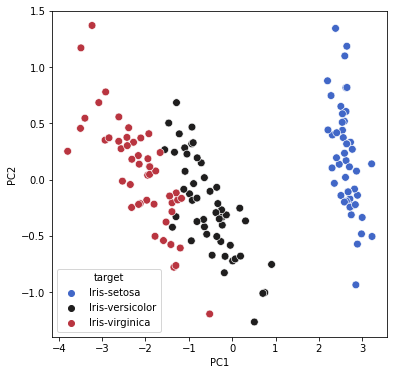

In [ ]:

plt.figure(figsize = (6,6))
sns.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire');


# LDA

* Minimize the Inter-Class Variability: Inter-class variability refers to including as many similar points as possible in one class. This ensures less number of misclassifications.
* Maximize the Distance Between the Mean of Classes: The classes’ mean is placed as far as possible to ensure high confidence during prediction.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [ ]:
class LDA():
  '''
   __init__: In the __init__ method, we initialize the number of components
   desired in the final output and an attribute to store the eigenvectors.
   def transform: We’ll consider Fischer’s score to reduce the dimensions of the input data.
   The Fischer score is computed using covariance matrices. The formula mentioned above is 
   limited to two dimensions. We’ll be coding a multi-dimensional solution. 
   Therefore, we’ll use the covariance matrices.
   The matrices scatter_t, scatter_b, and scatter_w are the covariance matrices. 
   scatter_w matrix denotes the intra-class covariance and scatter_b is the inter-class covariance matrix.
   scatter_t covariance matrix represents a temporary matrix that’s used to compute the scatter_b matrix.
   '''
  def __init__(self,n_componets):
    self.n_componets=n_componets
    self.eigenvectors=None
  def transform(self,X,y):
    height,width=X.shape # getting the shape of data
    unique_classes=np.unique(y)  # removing redundant classes
    number_classes=len(unique_classes)
    #  creating the temporary matrix
    scatter_t = np.cov(X.T)*(height - 1)
    #  creating scatter w matrix
    scatter_w = 0
    for i in range(number_classes):
        class_items = np.flatnonzero(y == unique_classes[i]) #Return indices that are non-zero in the flattened version of a.
        scatter_w = scatter_w + np.cov(X[class_items].T) * (len(class_items)-1)
    scatter_b = scatter_t - scatter_w
    _, eig_vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
    pc = X.dot(eig_vectors[:,::-1][:,:self.n_componets])
    #  Plotting the reduced data if n_componets is 2
    if self.n_componets == 2:
          if y is None:
              plt.scatter(pc[:,0],pc[:,1])
          else:
              colors = ['r','g','b']
              labels = np.unique(y)
              for color, label in zip(colors, labels):
                  class_data = pc[np.flatnonzero(y==label)]
                  plt.scatter(class_data[:,0],class_data[:,1],c=color)
          plt.show()
    return pc




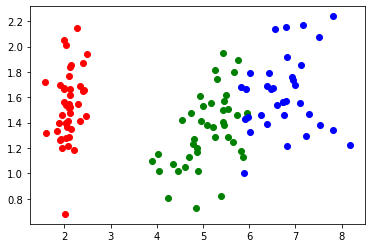

Original Data Size: (120, 4) 
Modified Data Size: (120, 2)


In [ ]:
LDA_obj = LDA(n_componets=2)
data = load_iris()
X, y = data.data, data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

LDA_object = LDA(n_componets=2)
X_train_modified = LDA_object.transform(X_train, Y_train)

print("Original Data Size:",X_train.shape, "\nModified Data Size:", X_train_modified.shape)